In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def get_energy_level(arr_x):
    num_amount = np.shape(arr_x)[0]
    total_eng = 0
    for i in range(num_amount):
        for j in range(i+1,num_amount):
            #print(np.linalg.norm(arr_x[i]-arr_x[j]))
            total_eng += 1/np.maximum(np.linalg.norm(arr_x[i]-arr_x[j]),0.001)
    return total_eng

In [3]:

def generate_optimal_circle(n,param =1):
    
    avg_dist  =(2*np.pi)/n
    base = np.arange(n)*avg_dist
    ret_points=np.zeros((2,n))
    ret_points[0] = param * np.sin(base)
    ret_points[1] = param * np.cos(base)
    return ret_points.T

def generate_optimal_circle_plus_center(n,param =1):
    
    avg_dist  =(2*np.pi)/(n-1)
    base = np.arange(n)*avg_dist
    ret_points=np.zeros((2,n))
    ret_points[0] = param * np.sin(base)
    ret_points[1] = param * np.cos(base)
    ret_points[0][-1] = 0
    ret_points[1][-1] = 0
    return ret_points.T


In [4]:
num_startat = 2
num_upto =15

arr_base_circpoints = []
arr_centr_circpoints = []
for i in range(num_startat,num_upto):
    arr_base_circpoints.append(get_energy_level(generate_optimal_circle(i,1)))
    arr_centr_circpoints.append(get_energy_level(generate_optimal_circle_plus_center(i,1)))

    

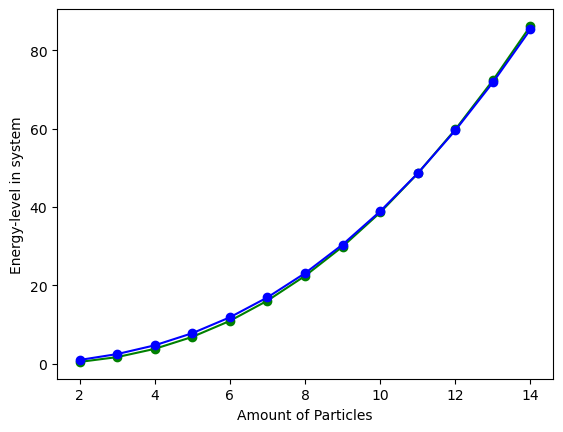

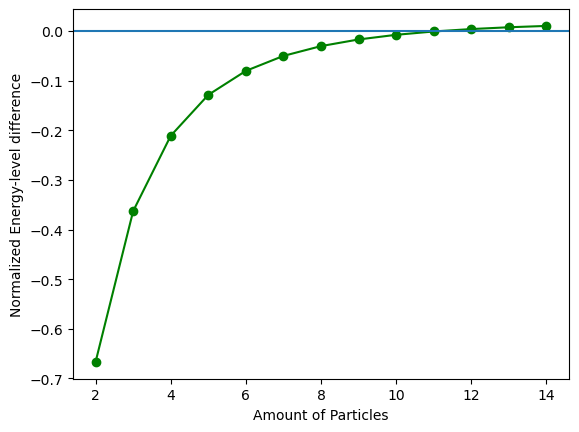

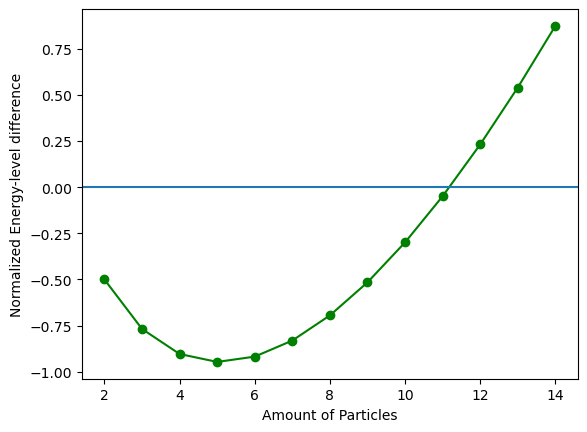

In [11]:

xaxis = np.arange(num_upto-num_startat) + num_startat
plt.plot(xaxis,arr_base_circpoints,"-go")
plt.plot(xaxis,arr_centr_circpoints,"-bo")
plt.ylabel("Energy-level in system")
plt.xlabel("Amount of Particles")
plt.savefig('graphs/pattern_comparison.pdf')
plt.show()


avg_energy = (np.array(arr_base_circpoints)+np.array(arr_centr_circpoints))/2
dif_energy = np.array(arr_base_circpoints)-np.array(arr_centr_circpoints)
plt.plot(xaxis,dif_energy/avg_energy,"-go")
plt.axhline(0)
plt.ylabel("Normalized Energy-level difference")
plt.xlabel("Amount of Particles")
plt.savefig('graphs/pattern_difference1.pdf')
plt.show()


plt.plot(xaxis,dif_energy,"-go")
plt.axhline(0)
plt.ylabel("Normalized Energy-level difference")
plt.xlabel("Amount of Particles")
plt.savefig('graphs/pattern_difference2.pdf')
plt.show()

In [6]:
np.array(arr_base_circpoints)-np.array(arr_centr_circpoints)

array([-0.5       , -0.76794919, -0.90362368, -0.94651752, -0.91780799,
       -0.83074752, -0.69442733, -0.51547757, -0.29895022, -0.04882386,
        0.2316864 ,  0.53992806,  0.87367522])

In [7]:
np.array(arr_base_circpoints)

array([ 0.5       ,  1.73205081,  3.82842712,  6.8819096 , 10.96410162,
       16.1333541 , 22.43892677, 29.9234492 , 38.62449898, 48.57567512,
       59.80736152, 72.34728957, 86.2209648 ])

In [8]:
np.array(arr_centr_circpoints)

array([ 1.        ,  2.5       ,  4.73205081,  7.82842712, 11.8819096 ,
       16.96410162, 23.1333541 , 30.43892677, 38.9234492 , 48.62449898,
       59.57567512, 71.80736152, 85.34728957])